<a href="https://colab.research.google.com/github/Harshini-Manchala/Machine_Learning_Lab/blob/main/ML_Lab1_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [76]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
df.shape

(545, 13)

In [78]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [79]:
display(df.isnull().sum())

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [80]:
cols_to_change = ['mainroad']  # example column names

for col in cols_to_change:
    df[col] = np.where(df[col].str.contains('no', case=False, na=False), 0, 1)

In [81]:
mapping_dict = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}

df['furnishingstatus'] = df['furnishingstatus'].map(mapping_dict)

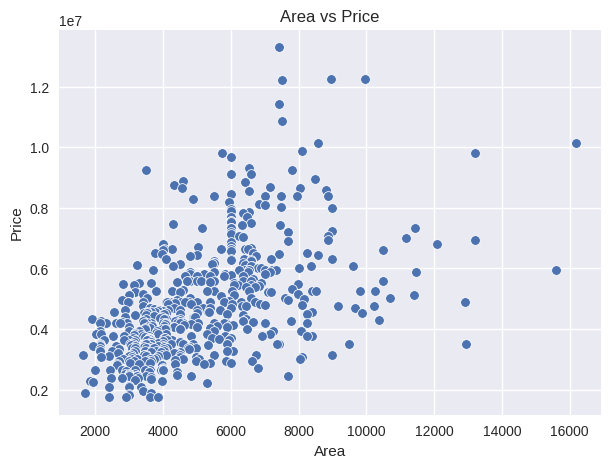

In [82]:

plt.figure(figsize=(7,5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


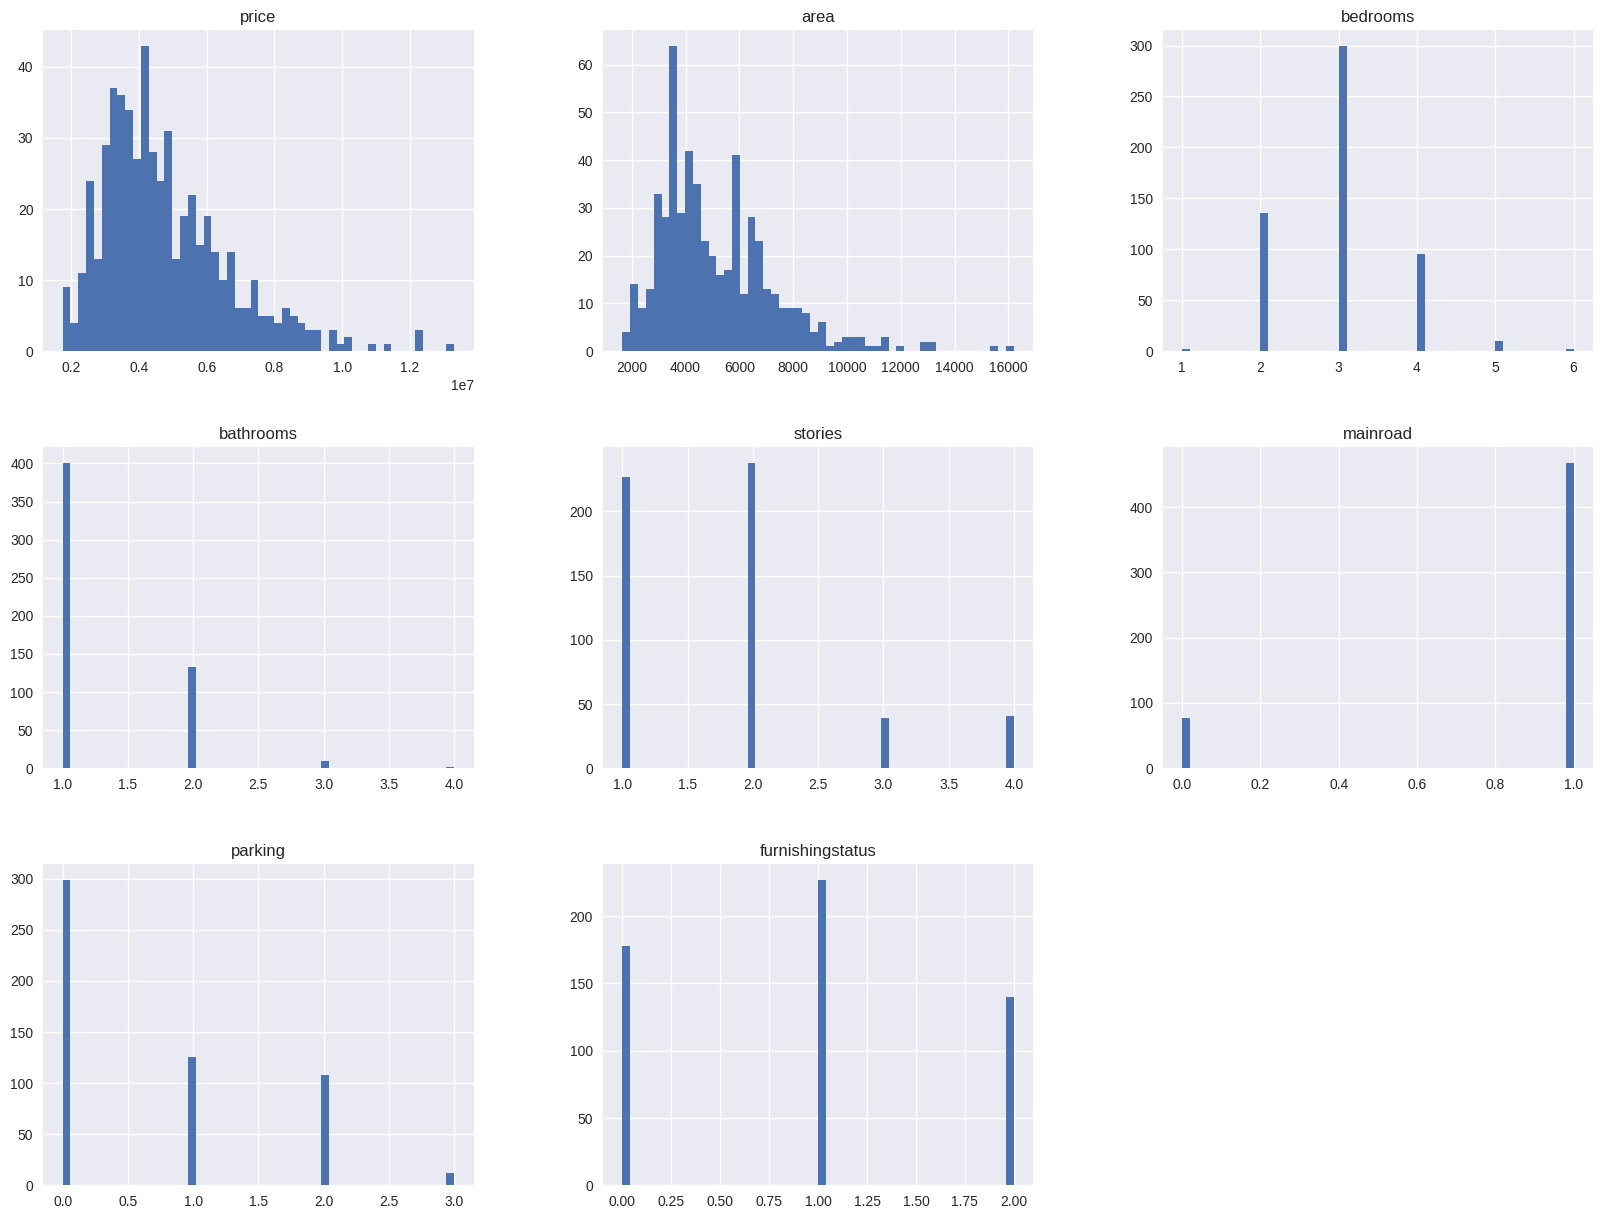

In [83]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

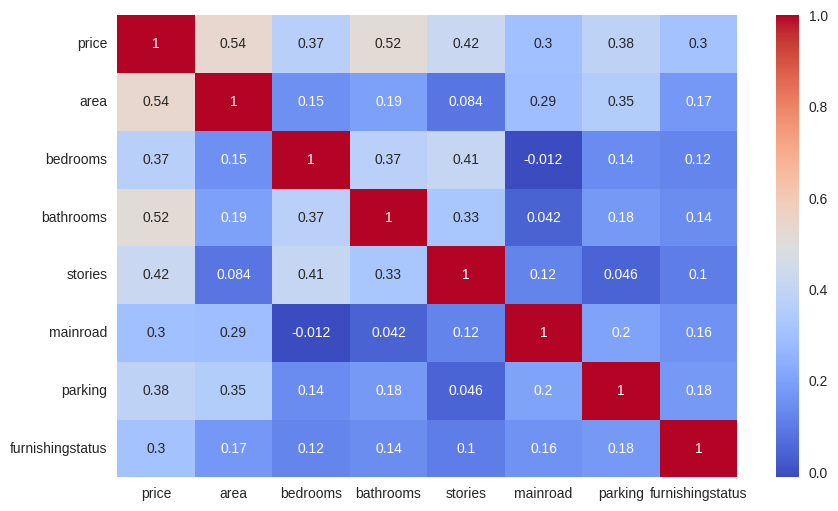

In [84]:
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("Housing.csv")

# Convert binary categorical features to numeric using get_dummies
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df = pd.get_dummies(df, columns=binary_cols, drop_first=True)

# Apply the mapping dictionary to the 'furnishingstatus' column
mapping_dict = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping_dict)


X = df[['area', 'bedrooms','bathrooms','stories','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus']].values
y = df['price'].values

# Convert X to float type
X = X.astype(float)

X = (X - X.mean(axis=0)) / X.std(axis=0)


X = np.c_[np.ones(X.shape[0]), X]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def initialize_weights(n_features):
    return np.zeros(n_features)

In [86]:
# Batch Gradient Descent
def train_batch(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = initialize_weights(n)
    for epoch in range(epochs):
        y_pred = X.dot(weights)
        error = y_pred - y
        gradient = (2/m) * X.T.dot(error)
        weights -= lr * gradient

        if epoch % 100 == 0:
            mse = np.mean(error ** 2)
            print(f"[Batch] Epoch {epoch}: MSE = {mse:.4f}")
    return weights

In [87]:

# Stochastic Gradient Descent
def train_online(X, y, lr=0.01, epochs=10):
    m, n = X.shape
    weights = initialize_weights(n)
    for epoch in range(epochs):
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            y_pred = xi.dot(weights)
            error = y_pred - yi
            gradient = 2 * xi.T.dot(error)
            weights -= lr * gradient.ravel()

        y_pred_all = X.dot(weights)
        mse = np.mean((y - y_pred_all) ** 2)
        print(f"[Online] Epoch {epoch}: MSE = {mse:.4f}")
    return weights

In [88]:

#  Prediction & Evaluation
def evaluate(X_test, y_test, weights, name="Model"):
    y_pred = X_test.dot(weights)
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"{name} Test MSE: {mse:.4f}")
    return y_pred

In [89]:
# Train both models
print("=== Training with Batch Gradient Descent ===")
batch_weights = train_batch(X_train, y_train, lr=0.01, epochs=1000)

print("\n=== Training with Stochastic Gradient Descent ===")
online_weights = train_online(X_train, y_train, lr=0.01, epochs=10)

# Evaluate on test data
print("\n=== Evaluating on Test Set ===")
evaluate(X_test, y_test, batch_weights, name="Batch GD")
evaluate(X_test, y_test, online_weights, name="Online GD")


=== Training with Batch Gradient Descent ===
[Batch] Epoch 0: MSE = 25234792406487.6133
[Batch] Epoch 100: MSE = 1392551653495.7954
[Batch] Epoch 200: MSE = 980182362513.5466
[Batch] Epoch 300: MSE = 970429059043.7527
[Batch] Epoch 400: MSE = 969960137119.2673
[Batch] Epoch 500: MSE = 969911427244.9945
[Batch] Epoch 600: MSE = 969904306296.4250
[Batch] Epoch 700: MSE = 969903098015.5710
[Batch] Epoch 800: MSE = 969902873837.4335
[Batch] Epoch 900: MSE = 969902829895.7407

=== Training with Stochastic Gradient Descent ===
[Online] Epoch 0: MSE = 1374396553953.8853
[Online] Epoch 1: MSE = 1374363893030.3452
[Online] Epoch 2: MSE = 1374364491783.3127
[Online] Epoch 3: MSE = 1374364482833.1060
[Online] Epoch 4: MSE = 1374364482438.0208
[Online] Epoch 5: MSE = 1374364482426.7107
[Online] Epoch 6: MSE = 1374364482426.4036
[Online] Epoch 7: MSE = 1374364482426.3948
[Online] Epoch 8: MSE = 1374364482426.3948
[Online] Epoch 9: MSE = 1374364482426.3953

=== Evaluating on Test Set ===
Batch GD Te

array([5737240.33462987, 5702836.87922012, 3456084.3000326 ,
       4116578.13475715, 3574673.10579758, 4107444.40100511,
       6032292.18458882, 6526191.06049351, 3898400.27539704,
       2810207.67011003, 8062431.31439365, 3324531.7930209 ,
       3174409.37612308, 3668299.77608407, 4225159.92150905,
       5489525.65366824, 2942125.02792941, 4732331.3975479 ,
       5179736.30481916, 3980955.62105974, 4198190.5263942 ,
       6245156.97477926, 3248211.21827971, 5481151.73726662,
       6795523.88549246, 7883723.85237626, 4655958.07895919,
       5841688.04423462, 8254450.91273947, 3313083.12728717,
       5719662.92696719, 3626858.78551134, 6189824.25252481,
       4214828.27170884, 3655770.8364351 , 5394907.01736406,
       6147245.8940543 , 4384683.28002413, 3146984.93439908,
       4264051.66898092, 5450285.05086319, 3577356.29987868,
       5681413.55999453, 4122406.81313248, 4181799.23879971,
       4632354.49205877, 5383357.45860252, 4173913.97578826,
       4426761.56717788,